In [23]:
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
inat_df = pd.read_csv("../observations-632017.csv/observations-632017.csv")
print(f"Shape of the dataset: {inat_df.shape}")
inat_df.head()


Shape of the dataset: (122549, 14)


,id,uuid,user_id,created_at,url,image_url,description,oauth_application_id,place_guess,species_guess,scientific_name,common_name,iconic_taxon_name,taxon_id
0,45574,4638cfa1-79cb-4f38-8898-a5932ce39a29,1000,2012-01-02 21:44:34 +0100,http://www.inaturalist.org/observations/45574,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Lake Michigan, Chicago, Illinois",American Coot,Fulica americana,American Coot,Aves,473
1,45575,9f914e0d-d3ed-4310-b1b3-8b5338b5aee6,1000,2012-01-02 21:44:35 +0100,http://www.inaturalist.org/observations/45575,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Lake Michigan, Chicago, Illinois",Red-breasted Merganser,Mergus serrator,Red-breasted Merganser,Aves,6996
2,45576,d95d10c9-0d6c-42a0-8e93-cfc6b18468ac,1000,2012-01-02 21:44:35 +0100,http://www.inaturalist.org/observations/45576,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Lake Michigan, Chicago, Illinois",Red-breasted Merganser,Mergus serrator,Red-breasted Merganser,Aves,6996
3,45578,cdd1349e-d74e-4d45-a869-d57ff2cce3aa,1000,2012-01-02 21:44:37 +0100,http://www.inaturalist.org/observations/45578,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Lake Michigan, Chicago, Illinois",Canada Goose,Branta canadensis,Canada Goose,Aves,7089
4,45579,acca2776-190a-42f2-817e-264e057e5188,1000,2012-01-02 21:44:37 +0100,http://www.inaturalist.org/observations/45579,https://inaturalist-open-data.s3.amazonaws.com...,NaN,NaN,"Lake Michigan, Chicago, Illinois",Red-breasted Merganser,Mergus serrator,Red-breasted Merganser,Aves,6996


In [ ]:
inat_df = inat_df[
    ["uuid", "url", "taxon_id", "common_name", "scientific_name", "iconic_taxon_name"]
]
inat_df.head()

,uuid,url,taxon_id,common_name,scientific_name,iconic_taxon_name
0,4638cfa1-79cb-4f38-8898-a5932ce39a29,http://www.inaturalist.org/observations/45574,473,American Coot,Fulica americana,Aves
1,9f914e0d-d3ed-4310-b1b3-8b5338b5aee6,http://www.inaturalist.org/observations/45575,6996,Red-breasted Merganser,Mergus serrator,Aves
2,d95d10c9-0d6c-42a0-8e93-cfc6b18468ac,http://www.inaturalist.org/observations/45576,6996,Red-breasted Merganser,Mergus serrator,Aves
3,cdd1349e-d74e-4d45-a869-d57ff2cce3aa,http://www.inaturalist.org/observations/45578,7089,Canada Goose,Branta canadensis,Aves
4,acca2776-190a-42f2-817e-264e057e5188,http://www.inaturalist.org/observations/45579,6996,Red-breasted Merganser,Mergus serrator,Aves


In [26]:
# Count of iconic taxon names
inat_df["iconic_taxon_name"].value_counts()

iconic_taxon_name
Aves        107734
Mammalia     14815
Name: count, dtype: int64

In [ ]:
# num class labels
len(inat_df["taxon_id"].unique())

906

In [27]:
aves_df = inat_df[inat_df["iconic_taxon_name"] == "Aves"]
mammals_df = inat_df[inat_df["iconic_taxon_name"] == "Mammalia"]

In [ ]:
print(f"Number of classes in Aves: {len(aves_df['taxon_id'].unique())}")
print(f"Some common names in Aves: {aves_df['common_name'].value_counts().head(10)}")
print("--------------------------------")
print(f"Number of classes in Mammals: {len(mammals_df['taxon_id'].unique())}")
print(
    f"Some common names in Mammals: {mammals_df['common_name'].value_counts().head(10)}"
)


Number of classes in Aves: 670
Some common names in Aves: common_name
Canada Goose                 3858
American Robin               3829
Red-winged Blackbird         3768
Mallard                      3462
House Sparrow                3299
Northern Cardinal            2932
Ring-billed Gull             2322
Black-crowned Night Heron    2239
Great Blue Heron             2053
Feral Pigeon                 2013
Name: count, dtype: int64
--------------------------------
Number of classes in Mammals: 236
Some common names in Mammals: common_name
Eastern Gray Squirrel    3962
Eastern Cottontail       2235
White-tailed Deer        1450
Eastern Chipmunk          878
Common Raccoon            719
Domestic Cat              546
Coyote                    509
Brown Rat                 476
Human                     472
Virginia Opossum          391
Name: count, dtype: int64


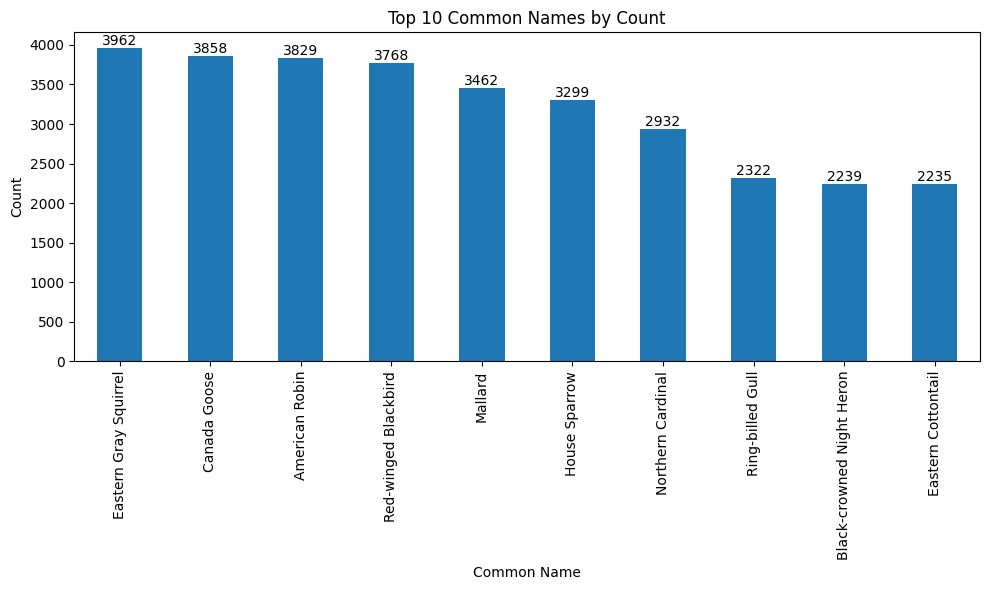

In [ ]:
# plot the top 10 common names by count
plt.figure(figsize=(10, 6))
inat_df["common_name"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Common Names by Count")
plt.xlabel("Common Name")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.tight_layout()
# display the number on top of the bar
for i, v in enumerate(inat_df["common_name"].value_counts().head(10)):
    plt.text(i, v, str(v), ha="center", va="bottom")

plt.show()

In [ ]:
import numpy as np

labels = np.array(inat_df["taxon_id"].unique())
print(f"Number of unique labels: {len(labels)}")
print(f"Some common labels: {labels[:10]}")
np.bincount(labels)

Number of unique labels: 906
Some common labels: [    473    6996    7089 1578489  122767    6930    9744   14850   43111
   46017]


array([0, 0, 0, ..., 0, 0, 1], shape=(1587552,))